In [60]:
# ! pip install nltk numpy pandas matplotlib seaborn

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [4]:
df = pd.read_csv('raw_data/computerscience_hot_posts.csv')

df.head()

,Unnamed: 0,created_utc,title,text,author,score,upvote_ratio,num_comments,url
0,0,1.673829e+09,"Looking for books, videos, or other resources ...",NaN,mobotsar,93,0.99,113,https://www.reddit.com/r/computerscience/comme...
1,1,1.686431e+09,/r/ComputerScience will be going dark starting...,"## Update (June 16th, 2023):\n\nThis subreddit...",nuclear_splines,290,0.97,21,https://www.reddit.com/r/computerscience/comme...
2,2,1.686512e+09,How computers measure time,Can someone explain this to me? I've been told...,RunDiscombobulated67,86,0.98,27,https://www.reddit.com/r/computerscience/comme...
3,3,1.686514e+09,Question About Registers,Hello everyone. There is a misunderstanding I ...,mellowhorses,62,0.97,24,https://www.reddit.com/r/computerscience/comme...
4,4,1.686507e+09,Learning a new skill,"Hey guys,\n\nWanted to ask what a good compute...",Haunting_Document142,30,0.90,38,https://www.reddit.com/r/computerscience/comme...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    100 non-null    int64  
 1   created_utc   100 non-null    float64
 2   title         100 non-null    object 
 3   text          85 non-null     object 
 4   author        97 non-null     object 
 5   score         100 non-null    int64  
 6   upvote_ratio  100 non-null    float64
 7   num_comments  100 non-null    int64  
 8   url           100 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 7.2+ KB


### EDA

In [20]:
df['score'].describe()

count    100.000000
mean      29.720000
std       77.139658
min        0.000000
25%        1.000000
50%        8.000000
75%       30.250000
max      691.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Half of The Posts have less than or equal 8 Upvotes')

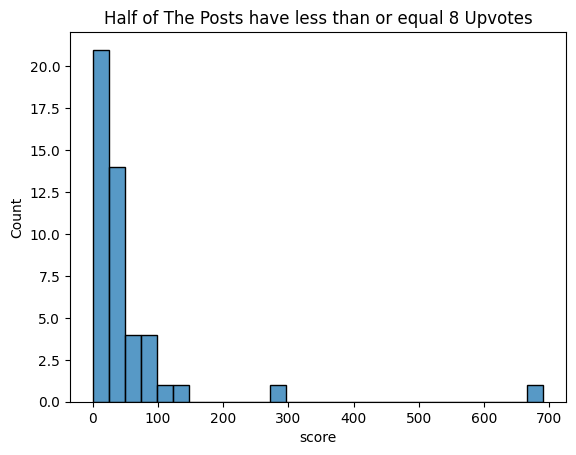

In [24]:
sns.histplot(pd.DataFrame(df['score'].value_counts(10)), x='score', binwidth=25).set_title("Half of The Posts have less than or equal 8 Upvotes")


In [29]:
df['author'].value_counts(normalize=False).head(10)

author
albeXL                11
luciferreeves          2
Squixell               2
shai-ber               2
HeadClicker52          2
PoliteRuleFollower     2
veterinarysite         2
jarekduda              1
rojoroboto             1
tentmap                1
Name: count, dtype: int64

### Text Pre-Processing

In [32]:
example_text = df['text'][5]
print(example_text)

I'm interested in many fields of CS so any event that you think is interesting, I will be looking it up. Though currently, I am interested the most in 3D graphics generation, data visualization, game dev, AR/VR and AI. I also have some experience in web dev, but not as much interest(still, will also be looking them up at least once).

Oh and an extra question: Which subreddit(s) would you recommend for being involved in and informed about these events?


In [45]:
tokens = word_tokenize(str(example_text))
tokens[:15]

['I',
 "'m",
 'interested',
 'in',
 'many',
 'fields',
 'of',
 'CS',
 'so',
 'any',
 'event',
 'that',
 'you',
 'think',
 'is']

In [53]:
tagged = pos_tag(tokens)
tagged[:15]

[('I', 'PRP'),
 ("'m", 'VBP'),
 ('interested', 'JJ'),
 ('in', 'IN'),
 ('many', 'JJ'),
 ('fields', 'NNS'),
 ('of', 'IN'),
 ('CS', 'NNP'),
 ('so', 'IN'),
 ('any', 'DT'),
 ('event', 'NN'),
 ('that', 'IN'),
 ('you', 'PRP'),
 ('think', 'VBP'),
 ('is', 'VBZ')]

In [58]:
entities = ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  'm/VBP
  interested/JJ
  in/IN
  many/JJ
  fields/NNS
  of/IN
  CS/NNP
  so/IN
  any/DT
  event/NN
  that/IN
  you/PRP
  think/VBP
  is/VBZ
  interesting/JJ
  ,/,
  I/PRP
  will/MD
  be/VB
  looking/VBG
  it/PRP
  up/RP
  ./.
  Though/NNP
  currently/RB
  ,/,
  I/PRP
  am/VBP
  interested/JJ
  the/DT
  most/RBS
  in/IN
  3D/CD
  graphics/NNS
  generation/NN
  ,/,
  data/NNS
  visualization/NN
  ,/,
  game/NN
  dev/NN
  ,/,
  AR/VR/NNP
  and/CC
  (ORGANIZATION AI/NNP)
  ./.
  I/PRP
  also/RB
  have/VBP
  some/DT
  experience/NN
  in/IN
  web/NN
  dev/NN
  ,/,
  but/CC
  not/RB
  as/RB
  much/JJ
  interest/NN
  (/(
  still/RB
  ,/,
  will/MD
  also/RB
  be/VB
  looking/VBG
  them/PRP
  up/RP
  at/IN
  least/JJS
  once/RB
  )/)
  ./.
  Oh/UH
  and/CC
  an/DT
  extra/JJ
  question/NN
  :/:
  Which/JJ
  subreddit/NN
  (/(
  s/NN
  )/)
  would/MD
  you/PRP
  recommend/VB
  for/IN
  being/VBG
  involved/VBN
  in/IN
  and/CC
  informed/VBD
  about/IN
  these/DT
  events/NNS
  ?/.)

### VADER Sentiment Analysis